In [1]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle
from urllib.request import urlopen
# Scrapes transcript data from songlyrics.com
def url_to_transcript(url):
    '''Returns transcript data specifically from songlyrics.com'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find_all(class_="songLyricsV14 iComment-text")]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['http://www.songlyrics.com/rihanna/we-found-love-lyrics/',
        'http://www.songlyrics.com/katy-perry/teenage-dream-lyrics/',
        'http://www.songlyrics.com/daft-punk-feat-pharrell-williams/get-lucky-radio-edit-lyrics/',
        'http://www.songlyrics.com/rolling-in-the-deep/rolling-in-the-deep-lyrics/',
        'http://www.songlyrics.com/niggas-in-paris/niggas-in-paris-lyrics/',
        'http://www.songlyrics.com/miley-cyrus/we-cant-stop-lyrics/',
        'http://www.songlyrics.com/drake/hold-on-were-going-home-lyrics/',
        'http://www.songlyrics.com/beyonc/countdown-lyrics/',
        'http://www.songlyrics.com/robyn/dancing-on-my-own-lyrics/',
        'http://www.songlyrics.com/miguel/adorn-lyrics/',
        'http://www.songlyrics.com/nicki-minaj/super-bass-lyrics/',
        'http://www.songlyrics.com/kacey-musgraves/follow-your-arrow-lyrics/',
        'http://www.songlyrics.com/lady-gaga/the-edge-of-glory-lyrics/',
        'http://www.songlyrics.com/sia/chandelier-lyrics/',
        'http://www.songlyrics.com/fun/some-nights-lyrics/']

# singers names
singers = ['rihanna', 'katy_perry', 'daft_punk', 'adele', 'jay_z', 'miley_cyrus', 'drake', 'beyonce', 'robyn', 'miguel', 'nicki_minaj', 'kacey','lady_gaga','sia','fun']

In [2]:
 # Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

http://www.songlyrics.com/rihanna/we-found-love-lyrics/
http://www.songlyrics.com/katy-perry/teenage-dream-lyrics/
http://www.songlyrics.com/daft-punk-feat-pharrell-williams/get-lucky-radio-edit-lyrics/
http://www.songlyrics.com/rolling-in-the-deep/rolling-in-the-deep-lyrics/
http://www.songlyrics.com/niggas-in-paris/niggas-in-paris-lyrics/
http://www.songlyrics.com/miley-cyrus/we-cant-stop-lyrics/
http://www.songlyrics.com/drake/hold-on-were-going-home-lyrics/
http://www.songlyrics.com/beyonc/countdown-lyrics/
http://www.songlyrics.com/robyn/dancing-on-my-own-lyrics/
http://www.songlyrics.com/miguel/adorn-lyrics/
http://www.songlyrics.com/nicki-minaj/super-bass-lyrics/
http://www.songlyrics.com/kacey-musgraves/follow-your-arrow-lyrics/
http://www.songlyrics.com/lady-gaga/the-edge-of-glory-lyrics/
http://www.songlyrics.com/sia/chandelier-lyrics/
http://www.songlyrics.com/fun/some-nights-lyrics/


In [3]:
# # Pickle files for later use

# # Make a new directory to hold the text files
!mkdir transcripts

for i, c in enumerate(singers):
     with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

A subdirectory or file transcripts already exists.


In [4]:
# Load pickled files
data = {}
for i, c in enumerate(singers):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [5]:
data.keys()

dict_keys(['rihanna', 'katy_perry', 'daft_punk', 'adele', 'jay_z', 'miley_cyrus', 'drake', 'beyonce', 'robyn', 'miguel', 'nicki_minaj', 'kacey', 'lady_gaga', 'sia', 'fun'])

In [ ]:
data['rihanna'][:2]

In [6]:
next(iter(data.keys()))

'rihanna'

In [7]:
next(iter(data.values()))

["Yellow diamonds in the light\nI was standing side by side\nAs your shadow crosses mine\nWhat it takes to come alive\n\nIt's the way I'm feeling, I just can't deny\nBut I've gotta let it go\n\nWe found love in a hopeless place\nWe found love in a hopeless place\nWe found love in a hopeless place\nWe found love in a hopeless place\n\nShine a light through an open door\nLove and life I will divide\nTurn away 'cause I need you more\nFeel the heartbeat in my mind\n\nIt's the way I'm feeling, I just can't deny\nBut I've gotta let it go\n\nWe found love in a hopeless place\nWe found love in a hopeless place\nWe found love in a hopeless place\nWe found love in a hopeless place\n\nYellow diamonds in the light\nI was standing side by side\nAs your shadow crosses mine\n\nWe found love in a hopeless place\nWe found love in a hopeless place\nWe found love in a hopeless place\nWe found love in a hopeless place\n\nWe found love in a hopeless place\nWe found love in a hopeless place\nWe found love i

In [8]:
# We are going to change this to key: singer, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [9]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [10]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150) 

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
adele,"There's a fire starting in my heart Reaching a fever pitch, it's bringing me out the dark\nFinally I can see you crystal clear Go 'head and sell m..."
beyonce,"Boooooooyyyyyyyy!\n\nOh, killin' me softly and I'm still fallin'\nStill the one I need, I will always be with you\nOh, you got me all gone, don't ..."
daft_punk,Like the legend of the phoenix\nOur ends were beginnings\nWhat keeps the planet spinning\nThe force from the beginning\n\nWe've come too far\nTo g...
drake,"I got my eyes on you, you're everything that I see\nI want your hot love and emotion endlessly\nI can't get over you, you left your mark on me\nI ..."
fun,Some nights I stay up cashing in my bad luck\nSome nights I call it a draw\nSome nights I wish that my lips could build a castle\nSome nights I wi...
jay_z,So I ball so hard mothafuckas wanna fine me\nFirst niggas gotta find me\nWhat's 50 grand to a mothafucka like me\nCan you please remind me? (Ball ...
kacey,If you save yourself for marriage\nYou're a bore\nIf you don't save yourself for marriage\nYou're a whore-able person\nIf you won't have a drink\n...
katy_perry,You think I'm pretty\nWithout any make-up on\nYou think I'm funny\nWhen I tell the punch line wrong\nI know you get me\nSo I'll let my walls come ...
lady_gaga,"There ain't no reason you and me should be alone\nTonight, yeah baby\nTonight, yeah baby\nI've got no reason that you who should take me home toni..."
miguel,"These lips can't wait to taste your skin, baby, no, no\nAnd these eyes, yeah, can't wait to see your grin, ooh ooh baby\nJust let my love\nJust le..."


In [11]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [12]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
adele,theres a fire starting in my heart reaching a fever pitch its bringing me out the dark\nfinally i can see you crystal clear go head and sell me ou...
beyonce,boooooooyyyyyyyy\n\noh killin me softly and im still fallin\nstill the one i need i will always be with you\noh you got me all gone dont ever let ...
daft_punk,like the legend of the phoenix\nour ends were beginnings\nwhat keeps the planet spinning\nthe force from the beginning\n\nweve come too far\nto gi...
drake,i got my eyes on you youre everything that i see\ni want your hot love and emotion endlessly\ni cant get over you you left your mark on me\ni want...
fun,some nights i stay up cashing in my bad luck\nsome nights i call it a draw\nsome nights i wish that my lips could build a castle\nsome nights i wi...
jay_z,so i ball so hard mothafuckas wanna fine me\nfirst niggas gotta find me\nwhats grand to a mothafucka like me\ncan you please remind me ball so ha...
kacey,if you save yourself for marriage\nyoure a bore\nif you dont save yourself for marriage\nyoure a whoreable person\nif you wont have a drink\nthen ...
katy_perry,you think im pretty\nwithout any makeup on\nyou think im funny\nwhen i tell the punch line wrong\ni know you get me\nso ill let my walls come down...
lady_gaga,there aint no reason you and me should be alone\ntonight yeah baby\ntonight yeah baby\nive got no reason that you who should take me home tonight\...
miguel,these lips cant wait to taste your skin baby no no\nand these eyes yeah cant wait to see your grin ooh ooh baby\njust let my love\njust let my lov...


In [13]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', ' ', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [14]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
adele,theres a fire starting in my heart reaching a fever pitch its bringing me out the dark finally i can see you crystal clear go head and sell me out...
beyonce,boooooooyyyyyyyy oh killin me softly and im still fallin still the one i need i will always be with you oh you got me all gone dont ever let me g...
daft_punk,like the legend of the phoenix our ends were beginnings what keeps the planet spinning the force from the beginning weve come too far to give up ...
drake,i got my eyes on you youre everything that i see i want your hot love and emotion endlessly i cant get over you you left your mark on me i want yo...
fun,some nights i stay up cashing in my bad luck some nights i call it a draw some nights i wish that my lips could build a castle some nights i wish ...
jay_z,so i ball so hard mothafuckas wanna fine me first niggas gotta find me whats grand to a mothafucka like me can you please remind me ball so hard ...
kacey,if you save yourself for marriage youre a bore if you dont save yourself for marriage youre a whoreable person if you wont have a drink then youre...
katy_perry,you think im pretty without any makeup on you think im funny when i tell the punch line wrong i know you get me so ill let my walls come down down...
lady_gaga,there aint no reason you and me should be alone tonight yeah baby tonight yeah baby ive got no reason that you who should take me home tonight i ...
miguel,these lips cant wait to taste your skin baby no no and these eyes yeah cant wait to see your grin ooh ooh baby just let my love just let my love a...


In [15]:
# Let's take a look at our dataframe
data_df

,transcript
adele,"There's a fire starting in my heart Reaching a fever pitch, it's bringing me out the dark\nFinally I can see you crystal clear Go 'head and sell m..."
beyonce,"Boooooooyyyyyyyy!\n\nOh, killin' me softly and I'm still fallin'\nStill the one I need, I will always be with you\nOh, you got me all gone, don't ..."
daft_punk,Like the legend of the phoenix\nOur ends were beginnings\nWhat keeps the planet spinning\nThe force from the beginning\n\nWe've come too far\nTo g...
drake,"I got my eyes on you, you're everything that I see\nI want your hot love and emotion endlessly\nI can't get over you, you left your mark on me\nI ..."
fun,Some nights I stay up cashing in my bad luck\nSome nights I call it a draw\nSome nights I wish that my lips could build a castle\nSome nights I wi...
jay_z,So I ball so hard mothafuckas wanna fine me\nFirst niggas gotta find me\nWhat's 50 grand to a mothafucka like me\nCan you please remind me? (Ball ...
kacey,If you save yourself for marriage\nYou're a bore\nIf you don't save yourself for marriage\nYou're a whore-able person\nIf you won't have a drink\n...
katy_perry,You think I'm pretty\nWithout any make-up on\nYou think I'm funny\nWhen I tell the punch line wrong\nI know you get me\nSo I'll let my walls come ...
lady_gaga,"There ain't no reason you and me should be alone\nTonight, yeah baby\nTonight, yeah baby\nI've got no reason that you who should take me home toni..."
miguel,"These lips can't wait to taste your skin, baby, no, no\nAnd these eyes, yeah, can't wait to see your grin, ooh ooh baby\nJust let my love\nJust le..."


In [16]:
# Let's add the singers' song as well
song = ['Rolling In the Deep', 'Countdown','Get Lucky','Hold On\', \'We\'re Goin\' Home','Some Nights','Niggas in Paris',
              'Follow Your Arrow','Teenage Dream', 'The Edge of Glory','Adorn',' We Can\'\t Stop',
              'Super Bass',' We Found Love','Dancing On My Own','Chandelier' ]

data_df['song'] = song
data_df

,transcript,song
adele,"There's a fire starting in my heart Reaching a fever pitch, it's bringing me out the dark\nFinally I can see you crystal clear Go 'head and sell m...",Rolling In the Deep
beyonce,"Boooooooyyyyyyyy!\n\nOh, killin' me softly and I'm still fallin'\nStill the one I need, I will always be with you\nOh, you got me all gone, don't ...",Countdown
daft_punk,Like the legend of the phoenix\nOur ends were beginnings\nWhat keeps the planet spinning\nThe force from the beginning\n\nWe've come too far\nTo g...,Get Lucky
drake,"I got my eyes on you, you're everything that I see\nI want your hot love and emotion endlessly\nI can't get over you, you left your mark on me\nI ...","Hold On', 'We're Goin' Home"
fun,Some nights I stay up cashing in my bad luck\nSome nights I call it a draw\nSome nights I wish that my lips could build a castle\nSome nights I wi...,Some Nights
jay_z,So I ball so hard mothafuckas wanna fine me\nFirst niggas gotta find me\nWhat's 50 grand to a mothafucka like me\nCan you please remind me? (Ball ...,Niggas in Paris
kacey,If you save yourself for marriage\nYou're a bore\nIf you don't save yourself for marriage\nYou're a whore-able person\nIf you won't have a drink\n...,Follow Your Arrow
katy_perry,You think I'm pretty\nWithout any make-up on\nYou think I'm funny\nWhen I tell the punch line wrong\nI know you get me\nSo I'll let my walls come ...,Teenage Dream
lady_gaga,"There ain't no reason you and me should be alone\nTonight, yeah baby\nTonight, yeah baby\nI've got no reason that you who should take me home toni...",The Edge of Glory
miguel,"These lips can't wait to taste your skin, baby, no, no\nAnd these eyes, yeah, can't wait to see your grin, ooh ooh baby\nJust let my love\nJust le...",Adorn


In [17]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

In [18]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,ac,ace,act,actin,adore,adorn,affect,agree,ah,aint,...,years,yellow,yes,yo,youd,youll,young,youre,yup,zone
adele,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,12,0,0
beyonce,0,0,0,0,0,0,0,0,0,2,...,1,0,0,1,0,0,0,2,2,0
daft_punk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
drake,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,0,0
fun,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
jay_z,0,1,1,1,0,0,0,0,0,4,...,0,0,0,0,1,1,0,0,0,10
kacey,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,12,0,0
katy_perry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,0,0,0
lady_gaga,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
miguel,0,0,0,0,4,6,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [20]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [21]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,adele,beyonce,daft_punk,drake,fun,jay_z,kacey,katy_perry,lady_gaga,miguel,miley_cyrus,nicki_minaj,rihanna,robyn,sia
ac,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
ace,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
act,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0
actin,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
adore,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0


In [22]:
# Find the top 30 words sung by each singer
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'adele': [('gonna', 24),
  ('deep', 16),
  ('rolling', 15),
  ('wish', 12),
  ('youre', 12),
  ('met', 12),
  ('tears', 11),
  ('fall', 10),
  ('played', 8),
  ('heart', 7),
  ('hand', 5),
  ('inside', 5),
  ('scars', 4),
  ('love', 4),
  ('beat', 4),
  ('woah', 4),
  ('leave', 3),
  ('starting', 2),
  ('help', 2),
  ('feeling', 2),
  ('fever', 2),
  ('thinking', 2),
  ('remind', 2),
  ('dark', 2),
  ('head', 2),
  ('theres', 2),
  ('breathless', 2),
  ('bringing', 2),
  ('pitch', 2),
  ('reaching', 2)],
 'beyonce': [('love', 14),
  ('boo', 11),
  ('im', 8),
  ('ooh', 8),
  ('got', 6),
  ('oh', 6),
  ('make', 6),
  ('fly', 4),
  ('mind', 4),
  ('gone', 4),
  ('black', 4),
  ('dont', 3),
  ('baby', 3),
  ('fallin', 3),
  ('grind', 3),
  ('ladies', 3),
  ('hes', 3),
  ('way', 3),
  ('ride', 3),
  ('trying', 3),
  ('leave', 3),
  ('ridin', 3),
  ('right', 3),
  ('pick', 3),
  ('kiss', 3),
  ('loud', 3),
  ('say', 3),
  ('feel', 3),
  ('fliest', 3),
  ('softly', 3)],
 'daft_punk': [('nigh

In [23]:
# Print the top 15 words sung by each singer
for singer, top_words in top_dict.items():
    print(singer)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

adele
gonna, deep, rolling, wish, youre, met, tears, fall, played, heart, hand, inside, scars, love
---
beyonce
love, boo, im, ooh, got, oh, make, fly, mind, gone, black, dont, baby, fallin
---
daft_punk
night, lucky, im, fun, sun, good, til, shes, lets, come, stars, cups, raise, weve
---
drake
youre, know, going, home, hold, just, girl, cause, good, want, love, endlessly, emotion, hot
---
fun
oh, nights, woah, come, im, stand, best, whoah, wish, thats, believe, sure, dont, just
---
jay_z
dont, ball, zone, hard, im, let, shit, like, know, whats, cray, aint, got, bitch
---
kacey
youre, lots, just, arrow, kiss, points, follow, straight, dont, yeah, narrow, gets, em, joint
---
katy_perry
look, dont, im, teenage, just, lets, way, dream, tonight, heart, real, make, turn, touch
---
lady_gaga
edge, im, tonight, glory, hanging, moment, baby, yeah, alright, truth, time, dangerous, fall, gonna
---
miguel
baby, know, let, love, yeah, gotta, oh, adorn, just, ooh, hey, adore, eyes, dont
---
miley_c

In [24]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each singer
words = []
for singer in data.columns:
    top = [word for (word, count) in top_dict[singer]]
    for t in top:
        words.append(t)
        
words

['gonna',
 'deep',
 'rolling',
 'wish',
 'youre',
 'met',
 'tears',
 'fall',
 'played',
 'heart',
 'hand',
 'inside',
 'scars',
 'love',
 'beat',
 'woah',
 'leave',
 'starting',
 'help',
 'feeling',
 'fever',
 'thinking',
 'remind',
 'dark',
 'head',
 'theres',
 'breathless',
 'bringing',
 'pitch',
 'reaching',
 'love',
 'boo',
 'im',
 'ooh',
 'got',
 'oh',
 'make',
 'fly',
 'mind',
 'gone',
 'black',
 'dont',
 'baby',
 'fallin',
 'grind',
 'ladies',
 'hes',
 'way',
 'ride',
 'trying',
 'leave',
 'ridin',
 'right',
 'pick',
 'kiss',
 'loud',
 'say',
 'feel',
 'fliest',
 'softly',
 'night',
 'lucky',
 'im',
 'fun',
 'sun',
 'good',
 'til',
 'shes',
 'lets',
 'come',
 'stars',
 'cups',
 'raise',
 'weve',
 'bar',
 'far',
 'keeps',
 'beginning',
 'legend',
 'want',
 'beginnings',
 'phoenix',
 'force',
 'present',
 'leave',
 'giving',
 'planet',
 'spinning',
 'ends',
 'feeling',
 'youre',
 'know',
 'going',
 'home',
 'hold',
 'just',
 'girl',
 'cause',
 'good',
 'want',
 'love',
 'endlessly

In [25]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('love', 10),
 ('im', 9),
 ('dont', 9),
 ('just', 8),
 ('got', 6),
 ('youre', 5),
 ('oh', 5),
 ('baby', 5),
 ('feel', 5),
 ('know', 5),
 ('cause', 5),
 ('look', 5),
 ('like', 5),
 ('way', 4),
 ('kiss', 4),
 ('yeah', 4),
 ('away', 4),
 ('gonna', 3),
 ('leave', 3),
 ('feeling', 3),
 ('make', 3),
 ('right', 3),
 ('night', 3),
 ('good', 3),
 ('come', 3),
 ('want', 3),
 ('home', 3),
 ('hard', 3),
 ('eyes', 3),
 ('let', 3),
 ('tonight', 3),
 ('run', 3),
 ('wish', 2),
 ('fall', 2),
 ('heart', 2),
 ('woah', 2),
 ('help', 2),
 ('theres', 2),
 ('ooh', 2),
 ('mind', 2),
 ('black', 2),
 ('say', 2),
 ('lets', 2),
 ('stars', 2),
 ('far', 2),
 ('going', 2),
 ('girl', 2),
 ('hot', 2),
 ('things', 2),
 ('think', 2),
 ('fine', 2),
 ('thats', 2),
 ('believe', 2),
 ('alright', 2),
 ('watching', 2),
 ('boys', 2),
 ('mean', 2),
 ('turn', 2),
 ('time', 2),
 ('push', 2),
 ('dancing', 2),
 ('gotta', 2),
 ('hey', 2),
 ('wont', 2),
 ('heartbeat', 2),
 ('better', 2),
 ('light', 2),
 ('standing', 2),
 ('open', 2)

In [26]:
# If more than half of the singers have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['love', 'im', 'dont', 'just']

In [27]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [28]:
# Let's make some word clouds!
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


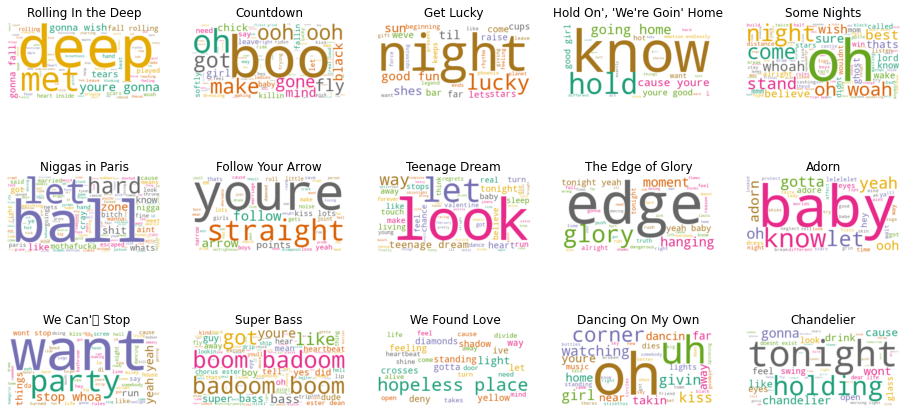

In [29]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 8]

song = ['Rolling In the Deep', 'Countdown','Get Lucky','Hold On\', \'We\'re Goin\' Home','Some Nights','Niggas in Paris',
              'Follow Your Arrow','Teenage Dream', 'The Edge of Glory','Adorn',' We Can\'\t Stop',
              'Super Bass',' We Found Love','Dancing On My Own','Chandelier' ]

# Create subplots for each singer
for index, singer in enumerate(data.columns):
    wc.generate(data_clean.transcript[singer])
    
    plt.subplot(3, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(song[index])
    
plt.show()

'We Found Love' had less repeating words than the other songs

In [30]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('love', 10),
 ('im', 9),
 ('dont', 9),
 ('just', 8),
 ('got', 6),
 ('youre', 5),
 ('oh', 5),
 ('baby', 5),
 ('feel', 5),
 ('know', 5),
 ('cause', 5),
 ('look', 5),
 ('like', 5),
 ('way', 4),
 ('kiss', 4),
 ('yeah', 4),
 ('away', 4),
 ('gonna', 3),
 ('leave', 3),
 ('feeling', 3),
 ('make', 3),
 ('right', 3),
 ('night', 3),
 ('good', 3),
 ('come', 3),
 ('want', 3),
 ('home', 3),
 ('hard', 3),
 ('eyes', 3),
 ('let', 3),
 ('tonight', 3),
 ('run', 3),
 ('wish', 2),
 ('fall', 2),
 ('heart', 2),
 ('woah', 2),
 ('help', 2),
 ('theres', 2),
 ('ooh', 2),
 ('mind', 2),
 ('black', 2),
 ('say', 2),
 ('lets', 2),
 ('stars', 2),
 ('far', 2),
 ('going', 2),
 ('girl', 2),
 ('hot', 2),
 ('things', 2),
 ('think', 2),
 ('fine', 2),
 ('thats', 2),
 ('believe', 2),
 ('alright', 2),
 ('watching', 2),
 ('boys', 2),
 ('mean', 2),
 ('turn', 2),
 ('time', 2),
 ('push', 2),
 ('dancing', 2),
 ('gotta', 2),
 ('hey', 2),
 ('wont', 2),
 ('heartbeat', 2),
 ('better', 2),
 ('light', 2),
 ('standing', 2),
 ('open', 2)

In [31]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucked','fuck','mothafucka','mothafuckas', 'shit']]
data_profanity = pd.concat([data_bad_words.fucked + data_bad_words.fuck +data_bad_words.mothafucka+data_bad_words.mothafuckas, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
adele,0,0
beyonce,0,1
daft_punk,0,0
drake,0,0
fun,1,0
jay_z,6,8
kacey,0,0
katy_perry,0,0
lady_gaga,0,0
miguel,0,0


'Niggas in Paris' with 8 's words' and 6 'f words' had the most bad words used in the song

C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


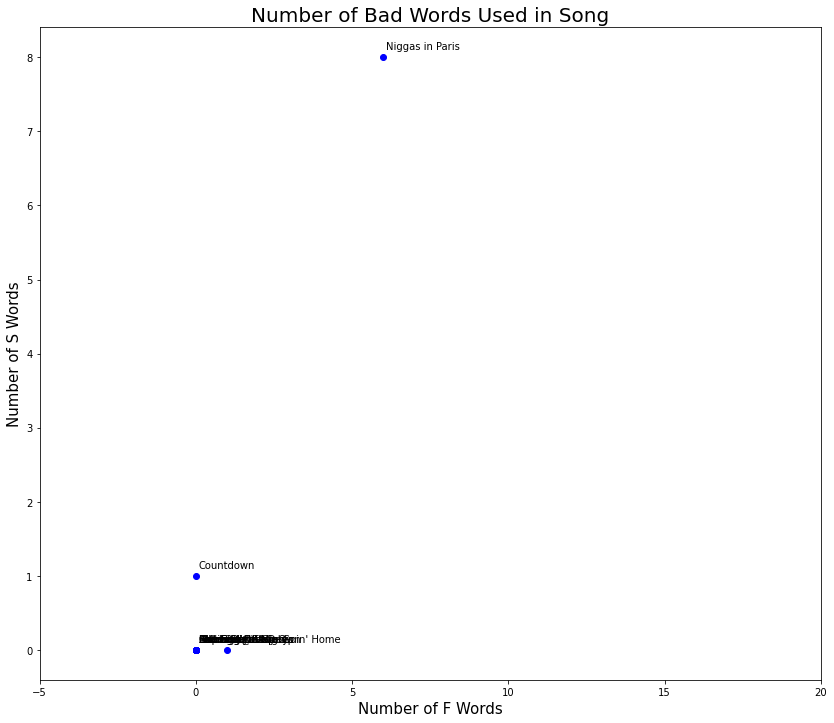

In [32]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [14, 12]

for i, singer in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[singer]
    y = data_profanity.s_word.loc[singer]
    plt.scatter(x,y, color='blue')
    plt.text(x+.1,y+.1, song[i], fontsize=10)
    plt.xlim(-5,20 ) 
    
plt.title('Number of Bad Words Used in Song', fontsize=20)
plt.xlabel('Number of F Words', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

'Niggas in Paris' with 8 's words' and 6 'f words' had the most bad words used in the song

In [33]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,song
adele,"There's a fire starting in my heart Reaching a fever pitch, it's bringing me out the dark\nFinally I can see you crystal clear Go 'head and sell m...",Rolling In the Deep
beyonce,"Boooooooyyyyyyyy!\n\nOh, killin' me softly and I'm still fallin'\nStill the one I need, I will always be with you\nOh, you got me all gone, don't ...",Countdown
daft_punk,Like the legend of the phoenix\nOur ends were beginnings\nWhat keeps the planet spinning\nThe force from the beginning\n\nWe've come too far\nTo g...,Get Lucky
drake,"I got my eyes on you, you're everything that I see\nI want your hot love and emotion endlessly\nI can't get over you, you left your mark on me\nI ...","Hold On', 'We're Goin' Home"
fun,Some nights I stay up cashing in my bad luck\nSome nights I call it a draw\nSome nights I wish that my lips could build a castle\nSome nights I wi...,Some Nights
jay_z,So I ball so hard mothafuckas wanna fine me\nFirst niggas gotta find me\nWhat's 50 grand to a mothafucka like me\nCan you please remind me? (Ball ...,Niggas in Paris
kacey,If you save yourself for marriage\nYou're a bore\nIf you don't save yourself for marriage\nYou're a whore-able person\nIf you won't have a drink\n...,Follow Your Arrow
katy_perry,You think I'm pretty\nWithout any make-up on\nYou think I'm funny\nWhen I tell the punch line wrong\nI know you get me\nSo I'll let my walls come ...,Teenage Dream
lady_gaga,"There ain't no reason you and me should be alone\nTonight, yeah baby\nTonight, yeah baby\nI've got no reason that you who should take me home toni...",The Edge of Glory
miguel,"These lips can't wait to taste your skin, baby, no, no\nAnd these eyes, yeah, can't wait to see your grin, ooh ooh baby\nJust let my love\nJust le...",Adorn


In [34]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,song,polarity,subjectivity
adele,"There's a fire starting in my heart Reaching a fever pitch, it's bringing me out the dark\nFinally I can see you crystal clear Go 'head and sell m...",Rolling In the Deep,0.087326,0.433160
beyonce,"Boooooooyyyyyyyy!\n\nOh, killin' me softly and I'm still fallin'\nStill the one I need, I will always be with you\nOh, you got me all gone, don't ...",Countdown,0.281321,0.629932
daft_punk,Like the legend of the phoenix\nOur ends were beginnings\nWhat keeps the planet spinning\nThe force from the beginning\n\nWe've come too far\nTo g...,Get Lucky,0.353061,0.720408
drake,"I got my eyes on you, you're everything that I see\nI want your hot love and emotion endlessly\nI can't get over you, you left your mark on me\nI ...","Hold On', 'We're Goin' Home",0.242500,0.579167
fun,Some nights I stay up cashing in my bad luck\nSome nights I call it a draw\nSome nights I wish that my lips could build a castle\nSome nights I wi...,Some Nights,0.162069,0.529310
jay_z,So I ball so hard mothafuckas wanna fine me\nFirst niggas gotta find me\nWhat's 50 grand to a mothafucka like me\nCan you please remind me? (Ball ...,Niggas in Paris,-0.088805,0.599748
kacey,If you save yourself for marriage\nYou're a bore\nIf you don't save yourself for marriage\nYou're a whore-able person\nIf you won't have a drink\n...,Follow Your Arrow,0.077146,0.497810
katy_perry,You think I'm pretty\nWithout any make-up on\nYou think I'm funny\nWhen I tell the punch line wrong\nI know you get me\nSo I'll let my walls come ...,Teenage Dream,0.021914,0.270216
lady_gaga,"There ain't no reason you and me should be alone\nTonight, yeah baby\nTonight, yeah baby\nI've got no reason that you who should take me home toni...",The Edge of Glory,-0.034249,0.606777
miguel,"These lips can't wait to taste your skin, baby, no, no\nAnd these eyes, yeah, can't wait to see your grin, ooh ooh baby\nJust let my love\nJust le...",Adorn,0.290196,0.477451


C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


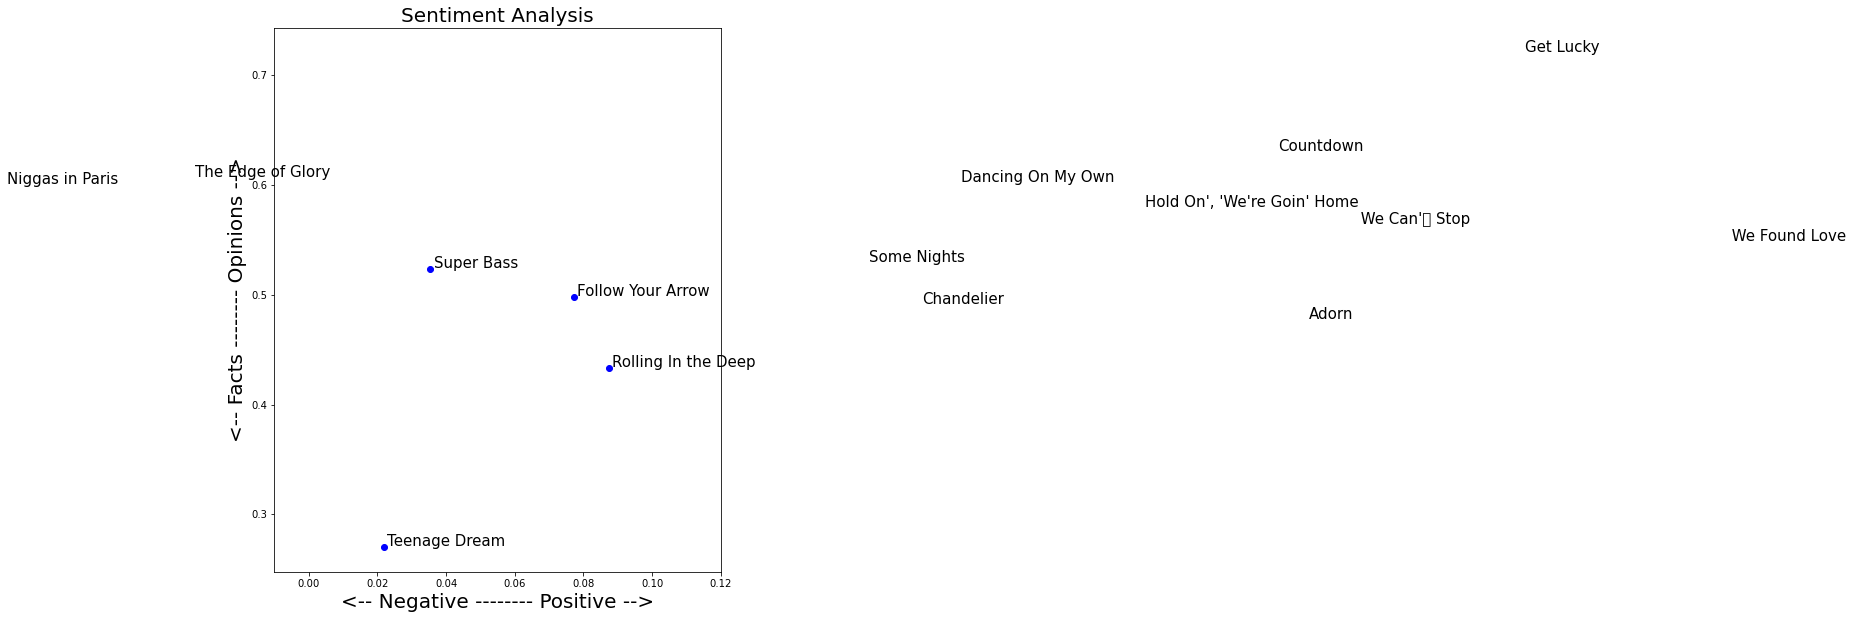

In [35]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 10]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['song'][index], fontsize=15)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=20)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=20)

plt.show()

'We Found Love' had a more Positive Sensitive Analysis than the others

In [37]:

# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [38]:
# Let's take a look at our data again
data

,transcript,song,polarity,subjectivity
adele,"There's a fire starting in my heart Reaching a fever pitch, it's bringing me out the dark\nFinally I can see you crystal clear Go 'head and sell m...",Rolling In the Deep,0.087326,0.433160
beyonce,"Boooooooyyyyyyyy!\n\nOh, killin' me softly and I'm still fallin'\nStill the one I need, I will always be with you\nOh, you got me all gone, don't ...",Countdown,0.281321,0.629932
daft_punk,Like the legend of the phoenix\nOur ends were beginnings\nWhat keeps the planet spinning\nThe force from the beginning\n\nWe've come too far\nTo g...,Get Lucky,0.353061,0.720408
drake,"I got my eyes on you, you're everything that I see\nI want your hot love and emotion endlessly\nI can't get over you, you left your mark on me\nI ...","Hold On', 'We're Goin' Home",0.242500,0.579167
fun,Some nights I stay up cashing in my bad luck\nSome nights I call it a draw\nSome nights I wish that my lips could build a castle\nSome nights I wi...,Some Nights,0.162069,0.529310
jay_z,So I ball so hard mothafuckas wanna fine me\nFirst niggas gotta find me\nWhat's 50 grand to a mothafucka like me\nCan you please remind me? (Ball ...,Niggas in Paris,-0.088805,0.599748
kacey,If you save yourself for marriage\nYou're a bore\nIf you don't save yourself for marriage\nYou're a whore-able person\nIf you won't have a drink\n...,Follow Your Arrow,0.077146,0.497810
katy_perry,You think I'm pretty\nWithout any make-up on\nYou think I'm funny\nWhen I tell the punch line wrong\nI know you get me\nSo I'll let my walls come ...,Teenage Dream,0.021914,0.270216
lady_gaga,"There ain't no reason you and me should be alone\nTonight, yeah baby\nTonight, yeah baby\nI've got no reason that you who should take me home toni...",The Edge of Glory,-0.034249,0.606777
miguel,"These lips can't wait to taste your skin, baby, no, no\nAnd these eyes, yeah, can't wait to see your grin, ooh ooh baby\nJust let my love\nJust le...",Adorn,0.290196,0.477451


In [39]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[["There's a fire starting in my heart Reaching a fever pitch, it's bringing me out the dark\nFinally I can see you crystal clear Go 'head and sell me out and I'll lay your ship bare\nSee how I leave with every piece of you\nDon't underestimate the things that I will do\nThere'",
  "s a fire starting in my heart Reaching a fever pitch And it's bringing me out the dark\nThe scars of your love remind me of us\nThey keep me thinking that we almost had it all\nThe scars of your love, they leave me breathless I can't help feeling We could have had it all (Y",
  "ou're gonna wish you never had met me) Rolling in the deep (Tears\nare gonna fall, rolling in the deep) You had my heart inside of your hand (You're gonna wish you never had met me)\nAnd you played it, to the beat (Tears are gonna fallrolling in the deep)\nBaby, I have no s",
  "tory to be told\nBut I've heard one on you\nAnd I'm gonna make your head burn Think of me in the depths of your despair\nMake a home down there\nAs mine sur

In [40]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[5.551115123125783e-18,
  0.2125,
  0.0,
  0.2814814814814815,
  0.16666666666666666,
  0.0,
  0.15,
  0.0,
  0.0,
  0.0],
 [0.35000000000000003,
  0.3541666666666667,
  0.015476190476190485,
  0.20634920634920637,
  0.17976190476190476,
  0.44583333333333336,
  0.425,
  0.15476190476190477,
  0.05,
  0.44583333333333336],
 [0.1,
  0.4444444444444444,
  0.26666666666666666,
  0.3583333333333333,
  0.38888888888888884,
  0.3333333333333333,
  0.3333333333333333,
  0.275,
  0.4444444444444444,
  0.3333333333333333],
 [0.15625,
  0.265,
  0.475,
  -0.2916666666666667,
  0.16666666666666666,
  0.4125,
  -0.2916666666666667,
  0.7,
  0.4125,
  -0.2916666666666667],
 [-0.6999999999999998,
  0.125,
  -0.0050000000000000044,
  0.0,
  0.45,
  0.5,
  0.0,
  -0.08,
  0.09500000000000001,
  1.0],
 [-0.05208333333333334,
  -0.14077380952380955,
  -0.35,
  -0.08015873015873015,
  -0.12833333333333335,
  -0.19,
  0.26785714285714285,
  0.0,
  0.29500000000000004,
  0.0],
 [0.0,
  -0.0513888888888888

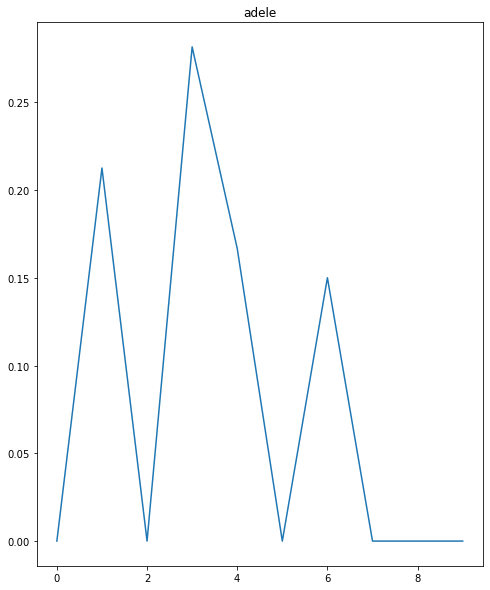

In [41]:
# Show the plot for one singer
plt.plot(polarity_transcript[0])
plt.title(data['song'].index[0])
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


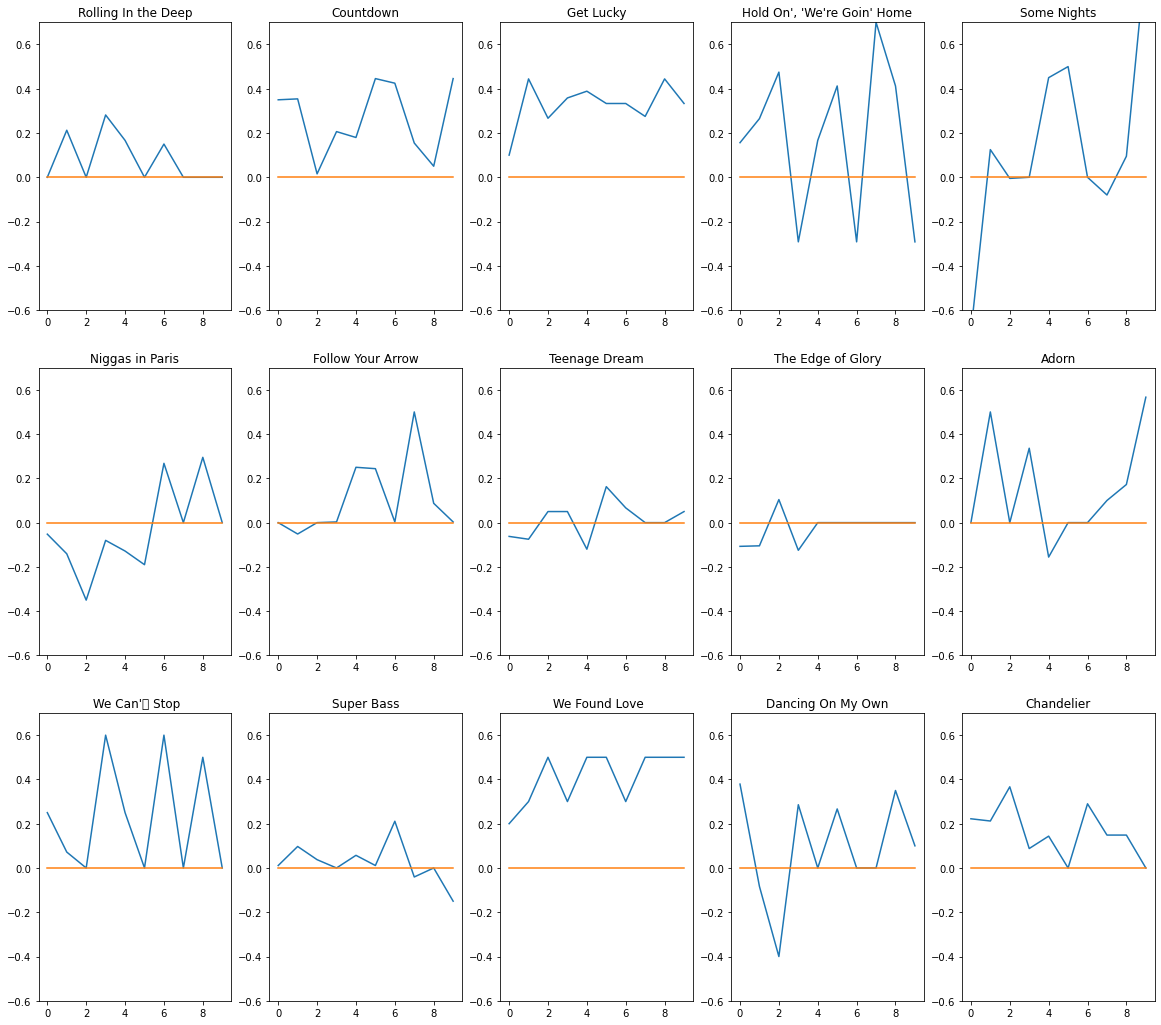

In [42]:
# Show the plot for all singers
plt.rcParams['figure.figsize'] = [20,18]

for index, singer in enumerate(data.index):    
    plt.subplot(3, 5, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['song'][index])
    plt.ylim(ymin=-.6, ymax=.7)
    
plt.show()

'We Found Love' is more consistent than the other songs